In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = ((20,10))

## Importing DataSets

In [3]:
df = pd.read_csv('banglore_home_prices.csv')
df.head(10)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['price'].agg(['count','min','max'])

,count,min,max
area_type,,,
Built-up Area,2418,9.00,2050.0
Carpet Area,87,13.00,500.0
Plot Area,2025,8.44,3600.0
Super built-up Area,8790,8.00,2912.0


In [6]:
df2 = df.drop(['area_type','availability','society','balcony'],axis='columns')

In [7]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


## Handling nan values

In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2 = df2.dropna()

In [10]:
13320-13246

74

In [11]:
df2['BHK'] = df2['size'].apply(lambda x: int(x.split()[0]))

C:\Users\sarad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df3= df2.copy()
df3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [14]:
def convert(var):
    x = var.split('-')
    if len(x)==2:
        return (float(x[0]) + float(x[1]))/2
    else:
        try:
            return float(x[0])
        except:
            return None

In [15]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
df3['total_sqft'] = df3['total_sqft'].apply(convert)

In [17]:
df3['price_per_sqft'] = df3['price']*100000/ df3['total_sqft']

In [18]:
df3.location = df3.location.apply(lambda x:x.strip())

In [19]:
stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [20]:
statsless_than_ten = stats[stats<=10]
len(stats)

1293

In [21]:
df3.location = df3.location.apply(lambda x: 'other' if x in statsless_than_ten else x)

In [22]:
len(df3.location.unique())

242

In [23]:
df4 = df3[~(df3.total_sqft/df3.BHK<300)]

In [24]:
df4.shape

(12502, 7)

### Outlier Detection

In [25]:
def Outlier(df):
    resdf = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        tempdf = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        resdf = pd.concat([resdf,tempdf],ignore_index=True)
    return resdf
df5 = Outlier(df4)
df5.shape

(10241, 7)

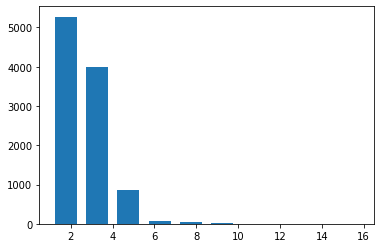

In [26]:
plt.hist(df5.BHK,rwidth=0.7)
plt.show()

In [27]:
def outlier_for_bhk(df):
    remove = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                remove = np.append(remove,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(remove,axis='index') 
            

In [28]:
df6 = outlier_for_bhk(df5)

In [29]:
df6.shape

(7329, 7)

In [30]:
df7 = df6[df6.bath<(df6.BHK+2)]

In [31]:
df7 = df7.drop(['size','price_per_sqft'],axis='columns')

In [32]:
dummies = pd.get_dummies(df7.location)

In [33]:
dummies = dummies.drop(['other'],axis='columns')

In [34]:
df8 = pd.concat([df7,dummies],axis='columns')

In [35]:
df8 = df8.drop('location',axis='columns')

In [36]:
df8.shape

(7251, 245)

# BUILDING Machine Learning MODEL

### Splitting Data

In [37]:
X = df8.drop('price',axis='columns')

In [38]:
y = df8.price

In [39]:
from sklearn.model_selection import train_test_split 

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

In [41]:
X_train.shape

(5800, 244)

## Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
linearregressor = LinearRegression()
linearregressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
X

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [293]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

def parameter_tuning(X,y):
    algo={ 'linearregresion':{
        'model':LinearRegression(),
        'params':{
            'normalize':[True,False]
        }
    },
          'DecisionTree':{
              'model':DecisionTreeRegressor(),
              'params':{
                  'criterion':['mse','friedman_mse'],
                  'splitter':['best','random']
                  
                  
              }
          }
        
        }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algo.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append(
        {
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
grid_search_result = parameter_tuning(X,y)
    

In [294]:
grid_search_result

,model,best_score,best_params
0,linearregresion,0.818354,{'normalize': True}
1,DecisionTree,0.728680,"{'criterion': 'mse', 'splitter': 'random'}"


### Predicting Price

In [295]:
def predicting_price(location,  sqft,bath,bhk):
    index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if index >=0:
        x[index]= 1
    return linearregressor.predict([x])


In [296]:
predicting_price('Indira Nagar',1000,2,2)

array([190.32860541])

In [298]:
predicting_price('Chikka Tirupathi',2600,5,4)

array([116.92141294])

### exporting Model To Pickel File

In [313]:
import pickle
with open('banglore_home_prices.pickle','wb') as f:
    pickle.dump(linearregressor,f)
    
    

In [314]:
import json
columns = {
    'data_colimns':[col.lower() for col in X.columns]
}
with open('banglore_home_prices.json','w') as f:
    f.write(json.dumps(columns))